### Build Model
#### Objective: Untuk mengetahui model mana yang terbaik dan seberapa signifikan performa model tersebut

In [1]:
import pandas as pd
import numpy as np

#load dataset
path = "dat_filtered/"
df_filter = "dfilter-2019-2021.xlsx"
dataset = pd.read_excel(path+df_filter, sheet_name="dff_ini")

In [2]:
dataset.shape

(22, 9)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Month            22 non-null     datetime64[ns]
 1   Positif_Bulanan  22 non-null     int64         
 2   Vaksin 1         22 non-null     float64       
 3   Vaksin 2         22 non-null     float64       
 4   CCI              20 non-null     float64       
 5   MRT              21 non-null     float64       
 6   Level            22 non-null     int64         
 7   Kapal Feri       13 non-null     float64       
 8   LRT              12 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 1.7 KB


In [4]:
dataset.head()

,Month,Positif_Bulanan,Vaksin 1,Vaksin 2,CCI,MRT,Level,Kapal Feri,LRT
0,2020-01-01,0,0.0,0.0,120.7,2638464.0,1,105999.0,118758.0
1,2020-02-01,0,0.0,0.0,119.8,2564870.0,1,98102.0,135477.0
2,2020-03-01,741,0.0,0.0,115.5,1403638.0,1,54237.0,60733.0
3,2020-04-01,3397,0.0,0.0,91.7,121578.0,2,3416.0,7312.0
4,2020-05-01,3134,0.0,0.0,76.3,43544.0,2,4958.0,5960.0


In [5]:
data_train = dataset[["Positif_Bulanan", "MRT"]]
data_train = data_train.dropna()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Positif_Bulanan  21 non-null     int64  
 1   MRT              21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 504.0 bytes


### Scaling Value
#### Sklearn StandardScaler (Z Score)


In [6]:
# using sklearn standardscaler
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler1 = scaler.fit(data_train["Positif_Bulanan"].values.reshape(-1, 1))
data_train["Positif_Bulanan"] = scaler1.transform(data_train["Positif_Bulanan"].values.reshape(-1, 1))

data_train.head()
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\n\nscaler1 = scaler.fit(data_train["Positif_Bulanan"].values.reshape(-1, 1))\ndata_train["Positif_Bulanan"] = scaler1.transform(data_train["Positif_Bulanan"].values.reshape(-1, 1))\n\ndata_train.head()\n'

In [7]:
'''
data_train = dataset.sample(frac=0.7, random_state=42).reset_index(drop=True)
data_test = dataset.drop(data_train.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data_train.shape))
print('Unseen Data For Predictions: ' + str(data_test.shape))
'''

"\ndata_train = dataset.sample(frac=0.7, random_state=42).reset_index(drop=True)\ndata_test = dataset.drop(data_train.index).reset_index(drop=True)\n\nprint('Data for Modeling: ' + str(data_train.shape))\nprint('Unseen Data For Predictions: ' + str(data_test.shape))\n"

In [8]:
from pycaret.regression import *
reg01 = setup(data=data_train, target='MRT', session_id = 1314)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1314
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(21, 2)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Linear Regression,396428.9987,355977940888.8246,437118.2960,nan,0.7274,1.2875,0.0032
1,Lasso Regression,350522.5550,347472629961.5432,377933.2133,nan,0.6405,1.1304,0.0032
2,Ridge Regression,396428.9987,355977940888.8246,437118.2960,nan,0.7274,1.2875,0.0029
3,Elastic Net,396428.7274,355977860725.6752,437118.0473,nan,0.7274,1.2875,0.0036
4,Least Angle Regression,359362.9500,356919733923.3500,386195.3699,nan,0.6451,1.0178,0.0062
5,Lasso Least Angle Regression,359361.8011,356920926651.9065,386194.4418,nan,0.6451,1.0178,0.0069
6,Orthogonal Matching Pursuit,320554.0964,346003788082.4342,349118.5071,nan,0.5644,0.9040,0.0030
7,Bayesian Ridge,396428.9987,355977940888.8246,437118.2960,nan,0.7274,1.2875,0.0038
8,Passive Aggressive Regressor,621801.1500,708055487911.3500,686045.6651,nan,3.6809,0.9590,0.0051
9,Random Sample Consensus,387362.6826,351009565293.2186,417800.9105,nan,0.6796,1.1278,0.0186


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [10]:
llar = create_model('omp')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,231544.6000,57867789459.4100,240557.2478,-12.6003,0.4694,0.3637
1,168295.0000,37645341246.4400,194024.0739,-0.3291,0.3734,0.2989
2,267787.0000,73003862153.0000,270192.2689,-0.0180,0.8892,1.3061
3,1297460.0000,2389983408305.6904,1545957.1172,-0.4197,2.0887,5.6513
4,936523.8182,877076862021.8511,936523.8182,nan,1.1002,0.6672
5,52289.0909,2734149028.0992,52289.0909,nan,0.1277,0.1362
6,7982.9091,63726837.5537,7982.9091,nan,0.0186,0.0188
7,98183.2727,9639955043.4380,98183.2727,nan,0.2084,0.1882
8,45893.0909,2106175793.1901,45893.0909,nan,0.1113,0.1178
9,99582.1818,9916610935.6694,99582.1818,nan,0.2565,0.2924


In [11]:
print(llar)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)


In [12]:
tuned_llar = tune_model(llar)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,192691.0556,41384730561.3641,203432.3734,-8.7264,0.3781,0.3008
1,168295.0000,31370001696.6049,177115.7861,-0.1076,0.3459,0.3286
2,267787.0000,78074654853.6420,279418.4225,-0.0888,0.9339,1.4368
3,1297460.0000,2425839918981.3457,1557510.8086,-0.4410,2.0811,5.4134
4,903217.7000,815802213593.2899,903217.7000,nan,1.0314,0.6435
5,91552.1000,8381787014.4100,91552.1000,nan,0.2139,0.2385
6,46876.7000,2197425002.8900,46876.7000,nan,0.1047,0.1104
7,60174.2000,3620934345.6400,60174.2000,nan,0.1225,0.1153
8,85102.8000,7242486567.8400,85102.8000,nan,0.1975,0.2184
9,139239.3000,19387582664.4900,139239.3000,nan,0.3428,0.4089


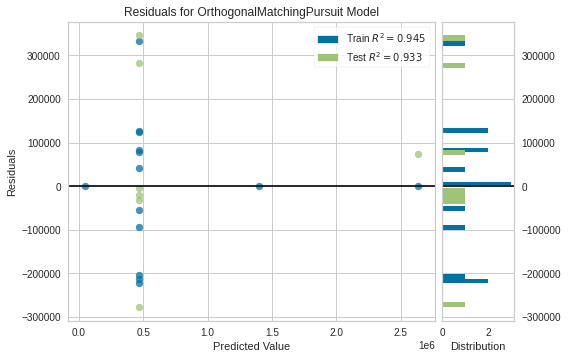

In [13]:
plot_model(tuned_llar)

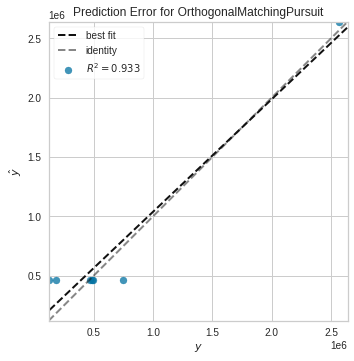

In [14]:
plot_model(tuned_llar, plot='error')

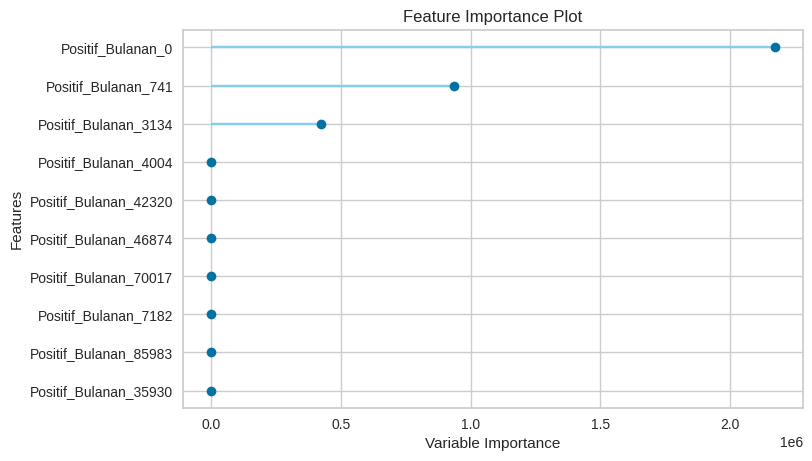

In [15]:
plot_model(tuned_llar, plot='feature')

In [16]:
evaluate_model(tuned_llar)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
predict_model(tuned_llar)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,147638.8052,4.034191e+10,200852.9674,0.933,0.6422,0.696


,Positif_Bulanan_0,Positif_Bulanan_113409,Positif_Bulanan_19108,Positif_Bulanan_21439,Positif_Bulanan_26565,Positif_Bulanan_271185,Positif_Bulanan_31229,Positif_Bulanan_31264,Positif_Bulanan_3134,Positif_Bulanan_3397,...,Positif_Bulanan_4004,Positif_Bulanan_42320,Positif_Bulanan_46874,Positif_Bulanan_70017,Positif_Bulanan_7182,Positif_Bulanan_741,Positif_Bulanan_85983,Positif_Bulanan_9925,MRT,Label
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2564870.0,2.638464e+06
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,487425.0,4.671142e+05
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,744488.0,4.671142e+05
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,470738.0,4.671142e+05
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121578.0,4.671142e+05
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,498680.0,4.671142e+05
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185647.0,4.671142e+05


### Hasil Analisis

- Pada pemodelan ini kami ingin mengetahui bagaimana konsistensi data observasi yang cenderung sedikit menunjukan tingkat penurunan jumlah penumpang disebabkan kondisi pandemi.<br>
- Hasilnya menunjukkan bahwa data observasi cukup signifikan memberi insight bahwa PT MRT Jakarta mengalami penurunan disebabkan karena pandemi.<br>
- Namun hal yang menarik adalah PT MRT sendiri mengklaim justru mengalami keuntungan.<br>
- Keuntungan yang dialami perlu kami breakdown, konteks apa yang menyebabkan hal itu terjadi, sementara moda transportasi lain justru mengalami kerugian, atau setidaknya kerugian berkorelasi positif terhadap penurunan jumlah penumpang.

### Breakdown Keuntungan MRT